## Part I: Exploratory analysis (3 points)

Read the dataset correctly using pandas, using an appropriate column as index (1 point)

In [1]:
# import pandas, numpy and matplotlib. Then we read and head the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv").set_index("PassengerId") #Changes the index to PassengerId
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking for missing values per column
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

EXERCISES

Compute the percentage of survivors out of total number of passengers...

In [4]:
# sums all the coulmn of Survived and divides by the total number of passengers 
print(f"The percentage of survivors out of the total number of passengers is equal to {sum(train['Survived'])/train['Survived'].count()*100:.2F}%")

The percentage of survivors out of the total number of passengers is equal to 38.38%


...and the percentage of men and women out of total number of passengers (0.5 points)

In [5]:
#value_counts counts the number of each value (like group by) and normalize divides it by the total number
round(train["Sex"].value_counts(normalize=True) * 100,1).astype(str) + "%"

male      64.8%
female    35.2%
Name: Sex, dtype: object

Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived)...

In [6]:
#We first group by Sex and then calculate the average for the survived column 
round(train.groupby(["Sex"])[["Survived"]].mean() * 100, 1).astype(str) + "%"

,Survived
Sex,
female,74.2%
male,18.9%


...and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women) (0.5 points)

In [7]:
# Frist we create a pivot table which counts the amount of survivors and deaths per sex
suv_dis = round(train.pivot_table(
    index="Sex", 
    columns="Survived", 
    aggfunc="size") 
                / train["Survived"].value_counts() * 100,2).astype(str) + '%' #then we divide the number by the total amount of survivors and deaths to have the percentage
#We formatted the the pivot table changing the order of the index, capitalizing the indexes and labeling the columns
suv_dis_output = suv_dis.sort_index(ascending = False).rename(index ={'female': 'Female','male': 'Male'}, columns = {0: 'Not Survived', 1: 'Survived'})
suv_dis_output.columns.name = None
suv_dis_output.index.name = None
#finally we just called the second column which has only the percentages per sex of survivors 
suv_dis_output.loc[:,["Survived"]]

,Survived
Male,31.87%
Female,68.13%


Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving (0.5 points)

One possible option:

|            | **Survived**      | **Not survived**      |
|------------|-------------------|-----------------------|
| **Male**   | Male & Survived   | Male & Not survived   |
| **Female** | Female & Survived | Female & Not survived |

Notice that the sum of all values in the table above should be 1 (or 100 %).

In [8]:
#we create a pivot table that counts the amount of people that survives and died per sex
df = round(train.pivot_table(
    index="Sex", 
    columns="Survived", 
    aggfunc="size") 
           / len(train) * 100, 1).astype(str) + "%" #Then we divide it by the the total number of passengers

#Correcting Format
df_survived_sex = df.sort_index(ascending = False).rename(index ={'female': 'Female','male': 'Male'}, columns = {0: 'Not Survived', 1: 'Survived'})
df_survived_sex.columns.name = None
df_survived_sex.index.name = None
df_survived_sex

,Not Survived,Survived
Male,52.5%,12.2%
Female,9.1%,26.2%


Display in a DataFrame the probability of survival/not survival of all combinations of sex and class (0.5 points)

One possible option:

|            |   | **Survived**              | **Not survived** |
|------------|---|---------------------------|------------------|
| **Male**   | 1 | Male & Survived & Class 1 | ...              |
|            | 2 | Male & Survived & Class 2 | ...              |
|            | 3 | Male & Survived & Class 3 | ...              |
| **Female** | 1 | ...                       | ...              |
|            | 2 | ...                       | ...              |
|            | 3 | ...                       | ...              |

Notice that the sum of all values in the table above should be 1 (or 100 %).

In [9]:
#we create a pivot table that counts the amount of people that survives and died per sex and class
df = round(train.pivot_table(
    index= ["Sex", "Pclass"], 
    columns="Survived", 
    aggfunc="size") 
           / len(train) * 100, 1).astype(str) + "%" #Then we divide it by the the total number of passengers

# Correcting Format
df_class_sex = df.sort_index(ascending = [False, True]).rename(index ={'female': 'Female','male': 'Male'}, columns = {0: 'Not Survived', 1: 'Survived'})
df_class_sex.columns.name = None
df_class_sex

Not Survived Survived
Sex    Pclass                      
Male   1              8.6%     5.1%
       2             10.2%     1.9%
       3             33.7%     5.3%
Female 1              0.3%    10.2%
       2              0.7%     7.9%
       3              8.1%     8.1%

## Part II: More insights on the data (3 points)

Present 3 insights about the dataset, each of them relating at least 3 different variables, and support them by code and numbers. Possible examples:

- "**Men** aged **less than 18** were more/less likely to **survive** than the average passenger" (Sex, Age, Survival)
- "**Women** with **no siblings or spouses** paid on average a cheaper/pricier **ticket** than the average woman" (Sex, SibSp, Fare)
- "**Men** with a **title other than Mr.** were more/less likely to have a known (i.e. non-missing) **cabin** than the average man" (Sex, Name, Cabin)

(Using these exact examples is valid, but awards fewer points than proposing original insights)

_Hint: If you want to work with lists and dictionaries rather than pandas objects, you can do_

```python
recs = df.to_dict(orient="records")
```

In [10]:
# Format the table and extract as much variables possible
df_train = train
df_train[['Last_Name', 'Name']] = train['Name'].str.split(',', expand = True) #Separates the name and the last name in two different columns
df_train[['Title', 'Name']] = train['Name'].str.split('.', n=1, expand = True) #Separates the title of the name and puts it in another column
df_train[['Cabin', 'Cabin_Others']] = train['Cabin'].str.split(' ', n=1, expand = True) #Separates the first cabin id from the other cabins 
df_train['Cabin_letter'] = train['Cabin'].str[0:1:] #separates the cabin id letter and adds a column
#then we reorder the columns
columns_order = ['PassengerId','Survived','Pclass','Title','Name','Last_Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Cabin_Others','Cabin_letter','Embarked']
df_train = df_train.reindex(columns = columns_order)
df_train

,PassengerId,Survived,Pclass,Title,Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Cabin_Others,Cabin_letter,Embarked
PassengerId,,,,,,,,,,,,,,,,
1,NaN,0,3,Mr,Owen Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,NaN,NaN,NaN,S
2,NaN,1,1,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.0,1,0,PC 17599,71.2833,C85,None,C,C
3,NaN,1,3,Miss,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,S
4,NaN,1,1,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.0,1,0,113803,53.1000,C123,None,C,S
5,NaN,0,3,Mr,William Henry,Allen,male,35.0,0,0,373450,8.0500,NaN,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,NaN,0,2,Rev,Juozas,Montvila,male,27.0,0,0,211536,13.0000,NaN,NaN,NaN,S
888,NaN,1,1,Miss,Margaret Edith,Graham,female,19.0,0,0,112053,30.0000,B42,None,B,S
889,NaN,0,3,Miss,"Catherine Helen ""Carrie""",Johnston,female,NaN,1,2,W./C. 6607,23.4500,NaN,NaN,NaN,S


Fare
Sex    Embarked Pclass          
female C        1       £ 115.64
                2        £ 25.27
                3        £ 14.69
       Q        1         £ 90.0
                2        £ 12.35
                3        £ 10.31
       S        1        £ 99.03
                2        £ 21.91
                3        £ 18.67
male   C        1        £ 93.54
                2        £ 25.42
                3         £ 9.35
       Q        1         £ 90.0
                2        £ 12.35
                3        £ 11.92
       S        1        £ 52.95
                2        £ 19.23
                3        £ 13.31

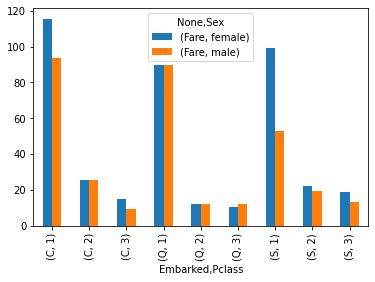

In [11]:
# Females pay more in all classes in ports C and S. Port Q seems to charge the similar prices
#We created a pivot table to show the average fare per class paid in average per sex
df_fares = round(df_train.pivot_table(
    values = ['Fare'],
    index = [ 'Sex', 'Embarked', 'Pclass'],
    aggfunc = 'mean'
),2)
df_fares.unstack(level = ['Sex']).plot.bar()
display('£ ' + df_fares.astype(str)) #displays the pivot table with £

Survived
Embarked Pclass         
C        1         69.4%
         2         52.9%
         3         37.9%
Q        1         50.0%
         2         66.7%
         3         37.5%
S        1         58.3%
         2         46.3%
         3         19.0%

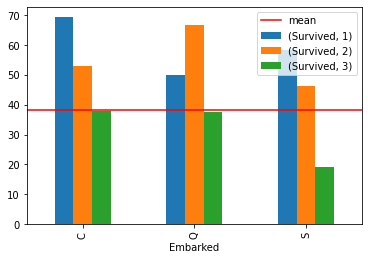

In [12]:
# Passengers who stepped up in Queensland and were in second class had a higher probability of surviving, which
# is inconsistent with the other two ports
#We created a pivot table to show the average survival rate per port and class
dfs = round(df_train.pivot_table(
    values = ['Survived'],
    index = ['Embarked', 'Pclass'],
    aggfunc = 'mean'
)*100,1)
dfs.unstack().plot(kind='bar', legend= False) #plots the pivot table
plt.axhline(train["Survived"].mean()*100, label="mean", color="red") #we include a line to show the average survival rate in the titanic
plt.legend() #includes the legend of the graph
display(dfs.astype(str) + '%') #displays the pivot table with %

<ipython-input-13-3384e3ff1d54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex_cabin['Has_cabin'] = np.where(


Survived         
Has_cabin    Cabin No Cabin
Sex                        
female       93.8%    65.4%
male         42.1%    13.6%

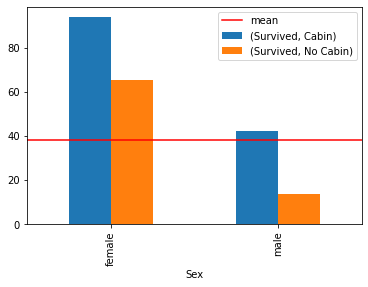

In [13]:
#Almost every female that were in a cabin survived (>93%), while males without a cabin had a very low probability of surviving
#First we create a sub dataframe 
df_sex_cabin = train[['Survived','Cabin_letter','Sex']]
#Then we add a column which show if a person had or not a cabin
df_sex_cabin['Has_cabin'] = np.where(
    df_sex_cabin['Cabin_letter'].isna() ,
    "No Cabin",
    "Cabin"
)
#Then we create a pivot table that finds the survival rate per sex, divide between having or not a cabin
pv_sex_cabin = round(df_sex_cabin.pivot_table(
    values = ['Survived'],
    index = 'Sex',
    columns = 'Has_cabin',
    aggfunc = 'mean'
)*100, 1)
pv_sex_cabin.plot.bar(legend= False) #plots the pivot table
plt.axhline(train["Survived"].mean()*100, label="mean", color="red") #we include a line to show the average survival rate in the titanic
plt.legend() #includes the legend of the graph
display(pv_sex_cabin.astype(str) + '%') #displays the pivot table with %